In [1]:

import networkx as nx
import re

In [2]:
import csv
genreDict = {}
rawReader = []
nodeList = []
node2Genre = {}
node2name = {}
node2Year = {}
with open ("./dataset/movies.csv", newline='') as f:
    reader = csv.DictReader(f)
    for i in reader:
        rawReader.append(i)
        nodeList.append(int(i['movieId']))
        titleRaw = i['title']
        yearList = list(re.findall('\d+', titleRaw))
        yearListInt = [int(i) for i in yearList]
        title_strip = re.sub("([\(\[]).*?([\)\]])", "", i['title'])
        node2name[int(i['movieId'])] = title_strip
        genres = i['genres'].split("|")
        node2Genre[int(i['movieId'])] = genres[0]
        if len(yearListInt):
            node2Year[int(i['movieId'])] = max(yearListInt)
        else:
            node2Year[int(i['movieId'])] = 0
        for genre in genres:
            if genre not in genreDict.keys():
                genreDict[genre] = [int(i['movieId'])]
            else:
                genreDict[genre].append(int(i['movieId']))
print(genreDict.keys())
print("# of genres is", len(genreDict.keys()))
print("genre to each count")
total_count = 0
for i in genreDict.keys():
    total_count += len(genreDict[i])
    print(i, len(genreDict[i]))

dict_keys(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)'])
# of genres is 20
genre to each count
Adventure 1263
Animation 611
Children 664
Comedy 3756
Fantasy 779
Romance 1596
Drama 4361
Action 1828
Crime 1199
Thriller 1894
Horror 978
Mystery 573
Sci-Fi 980
War 382
Musical 334
Documentary 440
IMAX 158
Western 167
Film-Noir 87
(no genres listed) 34


In [4]:
ratingsByUser = [[] for i in range(610)]
totalNum = 0
with open ("./dataset/ratings.csv") as f:
    reader = csv.DictReader(f)
    for index, item in enumerate(reader):
        ratingsByUser[int(item['userId'])-1].append(item) #remember to add 1 back to get true UserID

In [5]:
#Construct edges
from itertools import combinations
good_edge_dict = {}
bad_edge_dict = {}
for i, user in enumerate(ratingsByUser):
    userGood = []
    userBad = []
    print("executing user...", i)
    for j, record in enumerate(user):
        if float(record["rating"]) >= 3.0:
            userGood.append(int(record['movieId']))
        elif float(record["rating"]) <= 3.0:
            userBad.append(int(record['movieId']))
    gedge_p_u = list(combinations(userGood,2))
    bedge_p_u = list(combinations(userBad,2))
    for gedge in gedge_p_u:
        if gedge not in good_edge_dict.keys():
            good_edge_dict[gedge] = 1
        else:
            good_edge_dict[gedge] +=1
    for bedge in bedge_p_u:
        if bedge not in bad_edge_dict.keys():
            bad_edge_dict[bedge] = 1
        else:
            bad_edge_dict[bedge] +=1

executing user... 0
executing user... 1
executing user... 2
executing user... 3
executing user... 4
executing user... 5
executing user... 6
executing user... 7
executing user... 8
executing user... 9
executing user... 10
executing user... 11
executing user... 12
executing user... 13
executing user... 14
executing user... 15
executing user... 16
executing user... 17
executing user... 18
executing user... 19
executing user... 20
executing user... 21
executing user... 22
executing user... 23
executing user... 24
executing user... 25
executing user... 26
executing user... 27
executing user... 28
executing user... 29
executing user... 30
executing user... 31
executing user... 32
executing user... 33
executing user... 34
executing user... 35
executing user... 36
executing user... 37
executing user... 38
executing user... 39
executing user... 40
executing user... 41
executing user... 42
executing user... 43
executing user... 44
executing user... 45
executing user... 46
executing user... 47
ex

executing user... 380
executing user... 381
executing user... 382
executing user... 383
executing user... 384
executing user... 385
executing user... 386
executing user... 387
executing user... 388
executing user... 389
executing user... 390
executing user... 391
executing user... 392
executing user... 393
executing user... 394
executing user... 395
executing user... 396
executing user... 397
executing user... 398
executing user... 399
executing user... 400
executing user... 401
executing user... 402
executing user... 403
executing user... 404
executing user... 405
executing user... 406
executing user... 407
executing user... 408
executing user... 409
executing user... 410
executing user... 411
executing user... 412
executing user... 413
executing user... 414
executing user... 415
executing user... 416
executing user... 417
executing user... 418
executing user... 419
executing user... 420
executing user... 421
executing user... 422
executing user... 423
executing user... 424
executing 

In [6]:
movie2avgrate = {}
for i, user in enumerate(ratingsByUser):
    for j2, record in enumerate(user):
        if int(record['movieId']) not in movie2avgrate.keys():
            movie2avgrate[int(record['movieId'])] = [float(record["rating"])]
        else:
            movie2avgrate[int(record['movieId'])].append(float(record["rating"]))

In [7]:
import statistics

lenlist = [len(i) for _, i in movie2avgrate.items()]


9724
[215, 52, 102, 203, 204, 55, 23, 237, 44, 11, 66, 49, 104, 133, 70, 251, 307, 140, 50, 110, 329, 34, 157, 10, 42, 190, 238, 144, 220, 41, 61, 65, 164, 189, 279, 60, 181, 162, 49, 53, 121, 123, 202, 8, 92, 69, 8, 7, 18, 9, 13, 6, 25, 35, 15, 24, 40, 42, 21, 36, 119, 89, 131, 63, 47, 122, 62, 136, 211, 142, 200, 120, 107, 196, 126, 146, 83, 84, 102, 19, 6, 131, 23, 109, 143, 171, 48, 69, 53, 140, 23, 16, 60, 46, 39, 7, 1, 59, 100, 59, 77, 165, 31, 97, 13, 77, 32, 80, 106, 56, 2, 3, 31, 18, 10, 64, 42, 75, 57, 88, 38, 188, 8, 24, 8, 68, 30, 53, 13, 6, 39, 22, 6, 50, 108, 15, 21, 21, 18, 13, 43, 91, 40, 20, 57, 42, 80, 129, 18, 67, 25, 16, 9, 56, 54, 11, 35, 16, 13, 57, 26, 7, 94, 24, 56, 67, 278, 39, 12, 26, 87, 140, 61, 49, 9, 11, 5, 63, 75, 76, 120, 39, 91, 26, 204, 25, 3, 88, 32, 53, 36, 33, 218, 70, 97, 23, 24, 99, 59, 36, 79, 11, 11, 111, 29, 49, 15, 36, 61, 29, 31, 13, 14, 14, 43, 29, 18, 53, 61, 170, 41, 18, 62, 38, 40, 3, 28, 19, 133, 35, 7, 46, 317, 141, 131, 44, 28, 107, 14

In [8]:
from statistics import mean
import statistics
movie2avg = {key: mean(value) for key,value in movie2avgrate.items()}
m2asort = sorted(movie2avgrate.items(), key= lambda x: len(x))
m2asortNode = [i for (i, _) in m2asort]
mostRated = m2asortNode[:500]
m2rsort = {k: v for k, v in sorted(movie2avg.items(), key=lambda x: x[1])}


In [9]:
print(mean(movie2avg.values()))

3.2624482748109633


In [10]:
good_threshold = 70
bad_threshold = 6
print(len(bad_edge_dict.keys()))
print(len(good_edge_dict.keys()))
bad_filt = []
for i in bad_edge_dict:
    if bad_edge_dict[i] > bad_threshold:
        bad_filt.append(i)
    else:
        continue
print(len(bad_filt))
good_filt = []
for i in good_edge_dict:
    if good_edge_dict[i] > good_threshold:
        good_filt.append(i)
    else:
        continue
print(len(good_filt))

2301419
8152200
1152
1430


10453619

In [12]:
import networkx as nx
g = nx.Graph()
g.add_nodes_from(nodeList)
g.add_edges_from(good_filt)
g.add_edges_from(bad_filt)
nx.info(g)



'Name: \nType: Graph\nNumber of nodes: 9742\nNumber of edges: 2571\nAverage degree:   0.5278'

In [13]:
import matplotlib.pyplot as plt
# subgraph test
%matplotlib inline

gc = max(nx.connected_component_subgraphs(g), key=len)
m2rsortafterflt = {k:v for k, v in movie2avg.items() if k in gc.nodes()}
m2rsort = [k for k, v in sorted(m2rsortafterflt.items(), key=lambda x: x[1])]

nx.info(gc)


[2798, 1556, 3593, 2643, 3268, 3248, 2404, 1499, 2412, 1882, 546, 2053, 3440, 1644, 2450, 374, 2808, 2701, 1562, 2642, 44972, 6888, 3826, 5313, 1021, 355, 6503, 2253, 4247, 455, 3243, 762, 435, 3264, 69526, 1831, 1603, 193, 2471, 379, 1409, 2088, 6157, 2953, 65, 44, 6534, 1911, 6541, 1591, 432, 4388, 196, 1373, 173, 172, 3882, 2411, 673, 3623, 420, 3977, 5463, 19, 4015, 2410, 788, 585, 880, 3825, 4643, 1544, 2054, 34150, 2722, 2710, 784, 158, 2699, 186, 256, 59615, 719, 5481, 4638, 3269, 3257, 68319, 466, 160, 4367, 208, 153, 1717, 3785, 849, 1690, 3409, 485, 1405, 1590, 5459, 4310, 2605, 586, 2717, 30793, 52722, 95, 1377, 3247, 4890, 1485, 1552, 434, 185, 344, 6537, 8361, 1917, 4025, 6287, 231, 370, 1722, 4369, 4718, 1876, 1020, 168, 4270, 2723, 442, 1391, 2539, 2006, 410, 30825, 2628, 786, 2424, 2617, 520, 1380, 34048, 3624, 6934, 4447, 5378, 4734, 5502, 3755, 2470, 367, 2683, 1407, 5679, 317, 3717, 288, 46970, 2273, 2302, 33679, 1101, 6373, 736, 216, 1676, 6365, 45499, 785, 2012, 15

'Name: \nType: Graph\nNumber of nodes: 324\nNumber of edges: 2571\nAverage degree:  15.8704'

['47', '50', '110', '260', '296', '356', '457', '480', '527', '590', '592', '593', '608', '648', '780', '1073', '1136', '1196', '1197', '1198', '1210', '1265', '1270', '1291', '1580', '2028', '2571', '2858', '2959', '150', '318', '364', '588', '589', '595', '380', '2762', '3114', '4306', '4886', '4993', '5952', '6539', '7153', '858', '32', '6377', '377']


In [31]:
import json
data = []

for n in gc.nodes():
    l = list(gc.neighbors(n))
    nl = [str(i) for i in l]
    data.append({
        'id': str(n),
        'genre': node2Genre[n],
        'neighbor': l,
        'avgrate': movie2avg[n],
        'title': node2name[n],
        'year': node2Year[n]
    })

with open('maindata.json', 'w') as out:
    json.dump(data, out)

In [15]:
nx.diameter(gc)

6

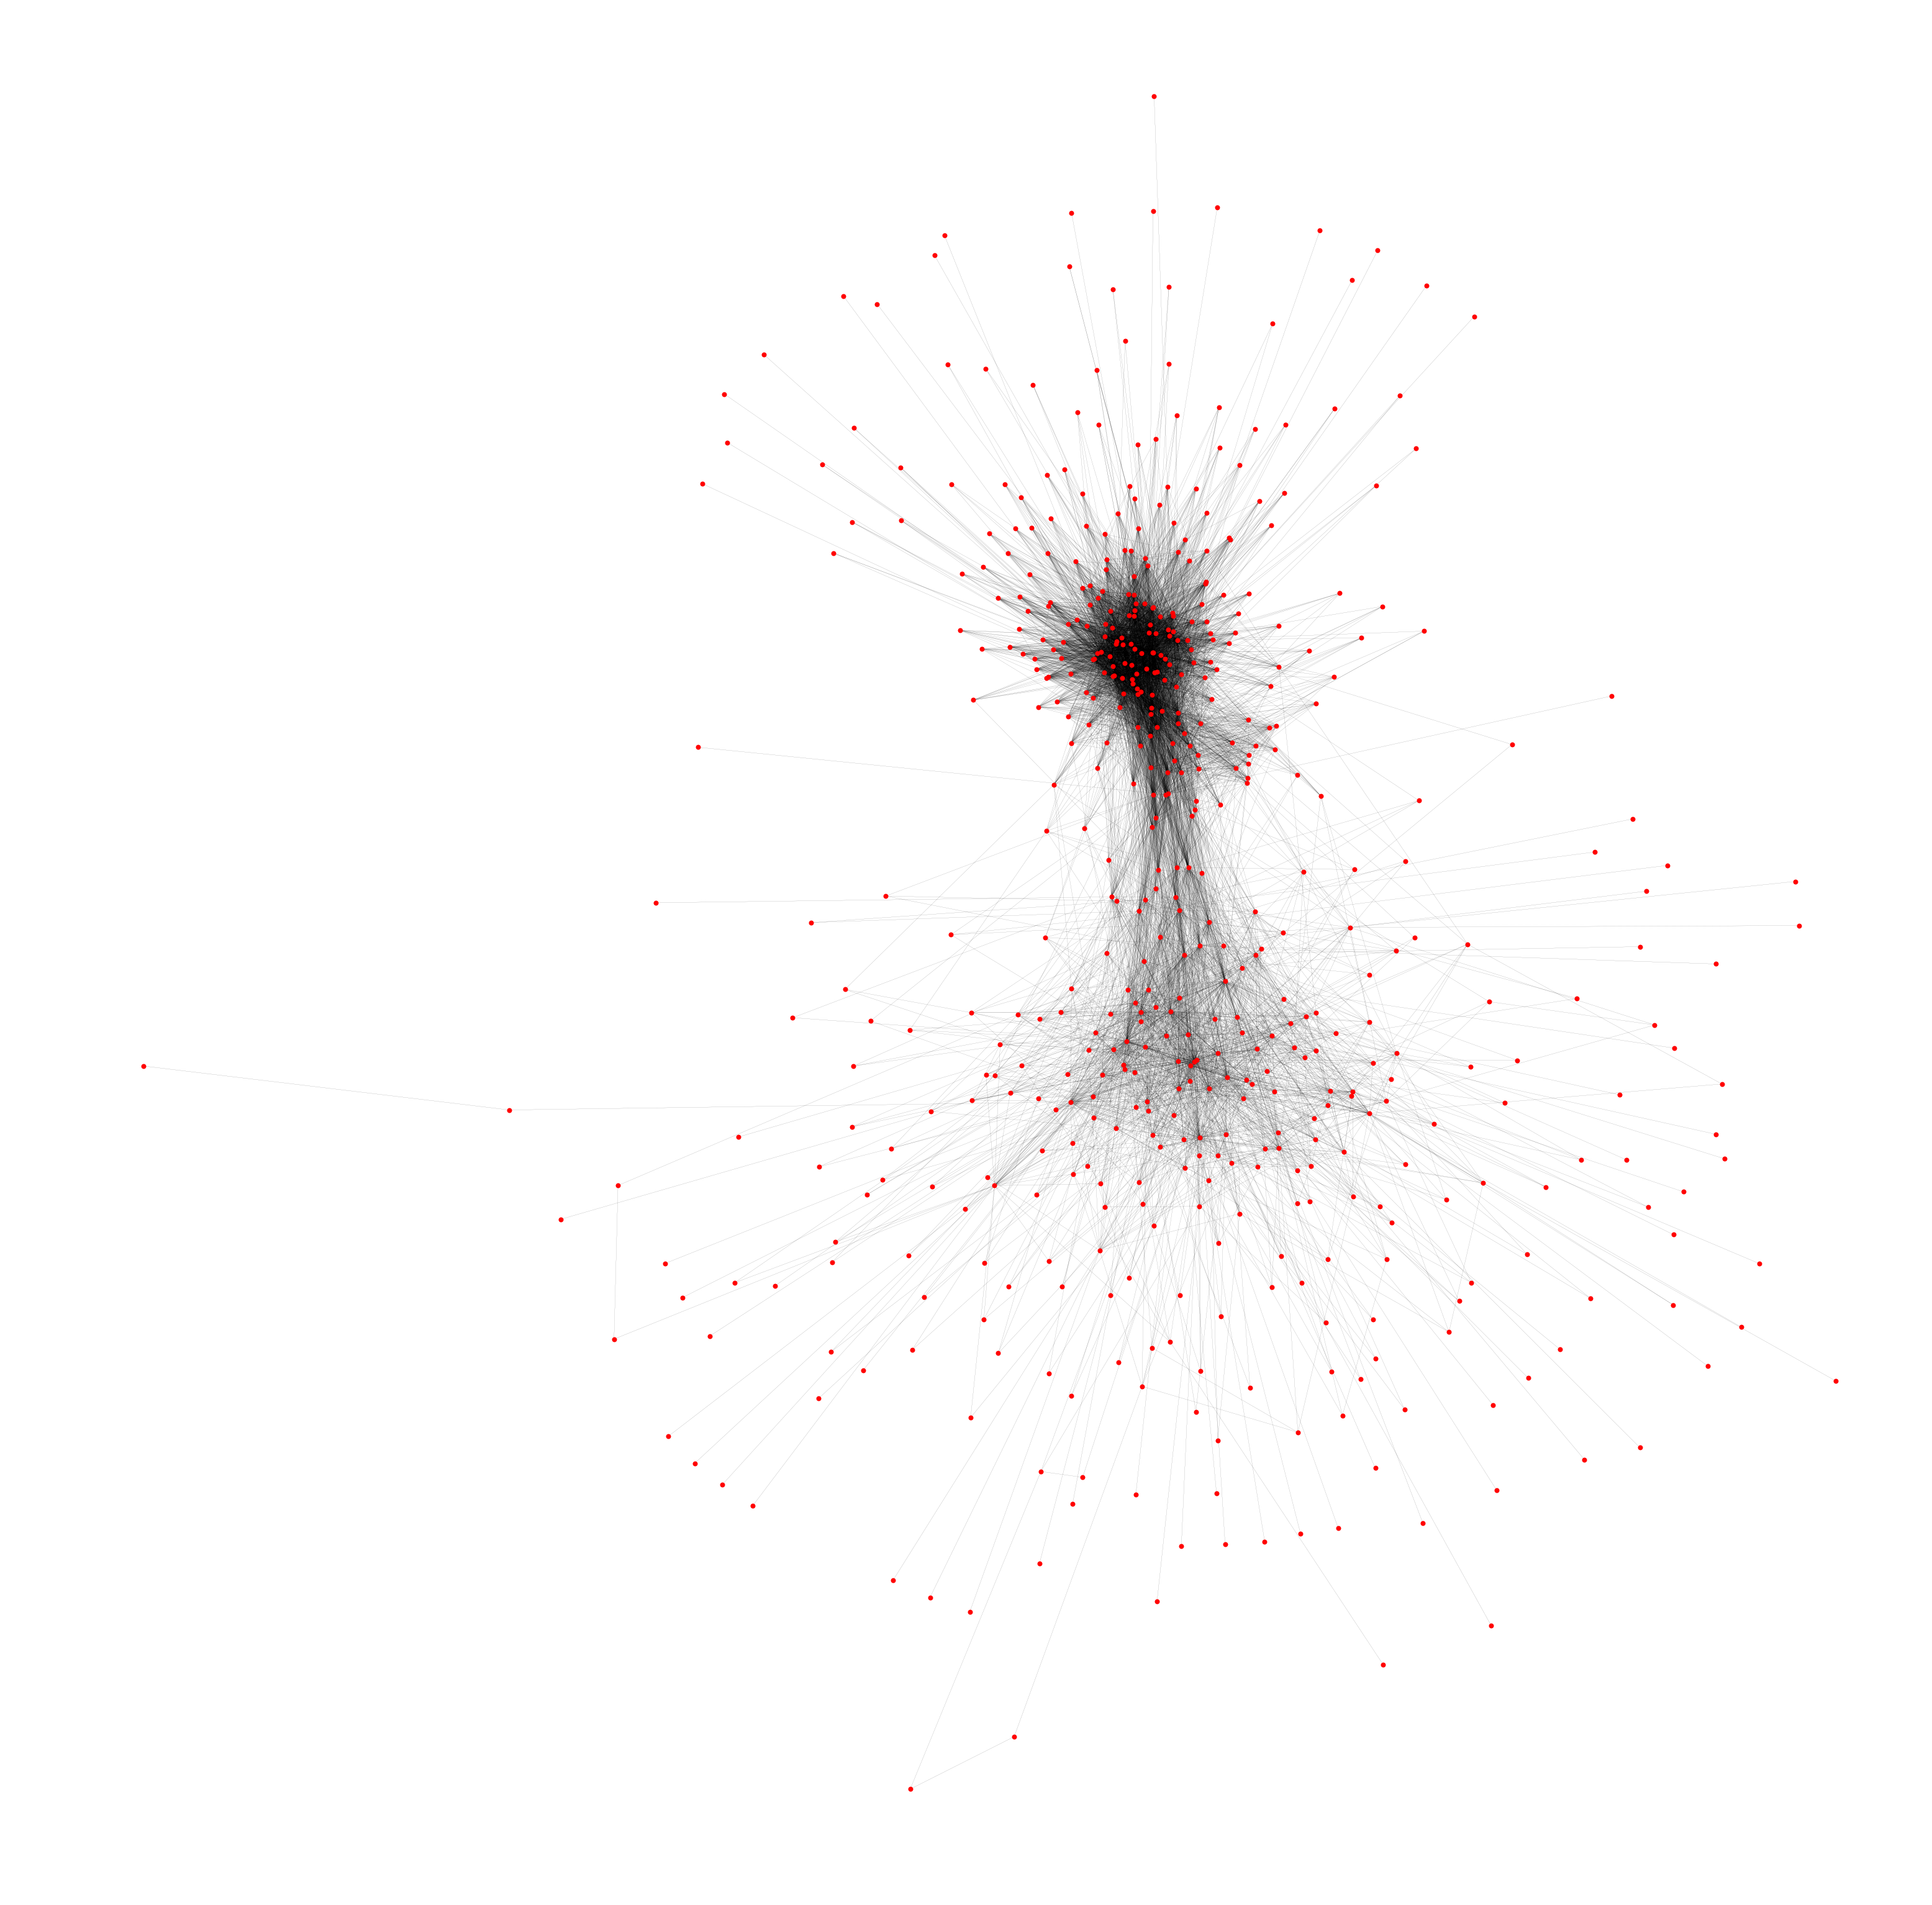

In [49]:
plt.figure(figsize=(20,20), dpi=150)
nx.draw(gc,
        pos=nx.spring_layout(gc),
        node_size = 8,
        width = 0.05)
plt.show()